In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pprint
from collections import Counter

from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from JusticeModel import JusticeModel

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


## Try Predicting by Case

In [7]:
justices = ['alito', 'breyer', 'kagan', 'kavanaugh', 'ginsburg', 'gorsuch', 'roberts', 'sotomayor', 'thomas']
justice_models = []
for justice in justices:
    model = SVC(degree=2, 
                  gamma='auto', 
                  kernel='poly')
    
    jm = JusticeModel(justice, mode='crossval', model=model)
    jm.fit(balance_method=None)
    justice_models.append(jm)

Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.


In [8]:
true_votes = []
pred_votes = []

for justice, model in zip(justices, justice_models):
    fpath = 'data/test/%s.csv' % justice.capitalize()
    test_data = pd.read_csv(fpath)
    X = test_data['cleanText'].fillna(' ').to_numpy()
    y_true = test_data['vote'].to_numpy()
    
    y_pred = model.predict(X)
    
    true_votes.append(y_true)
    pred_votes.append(y_pred)

# How each justice does on training set

Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.


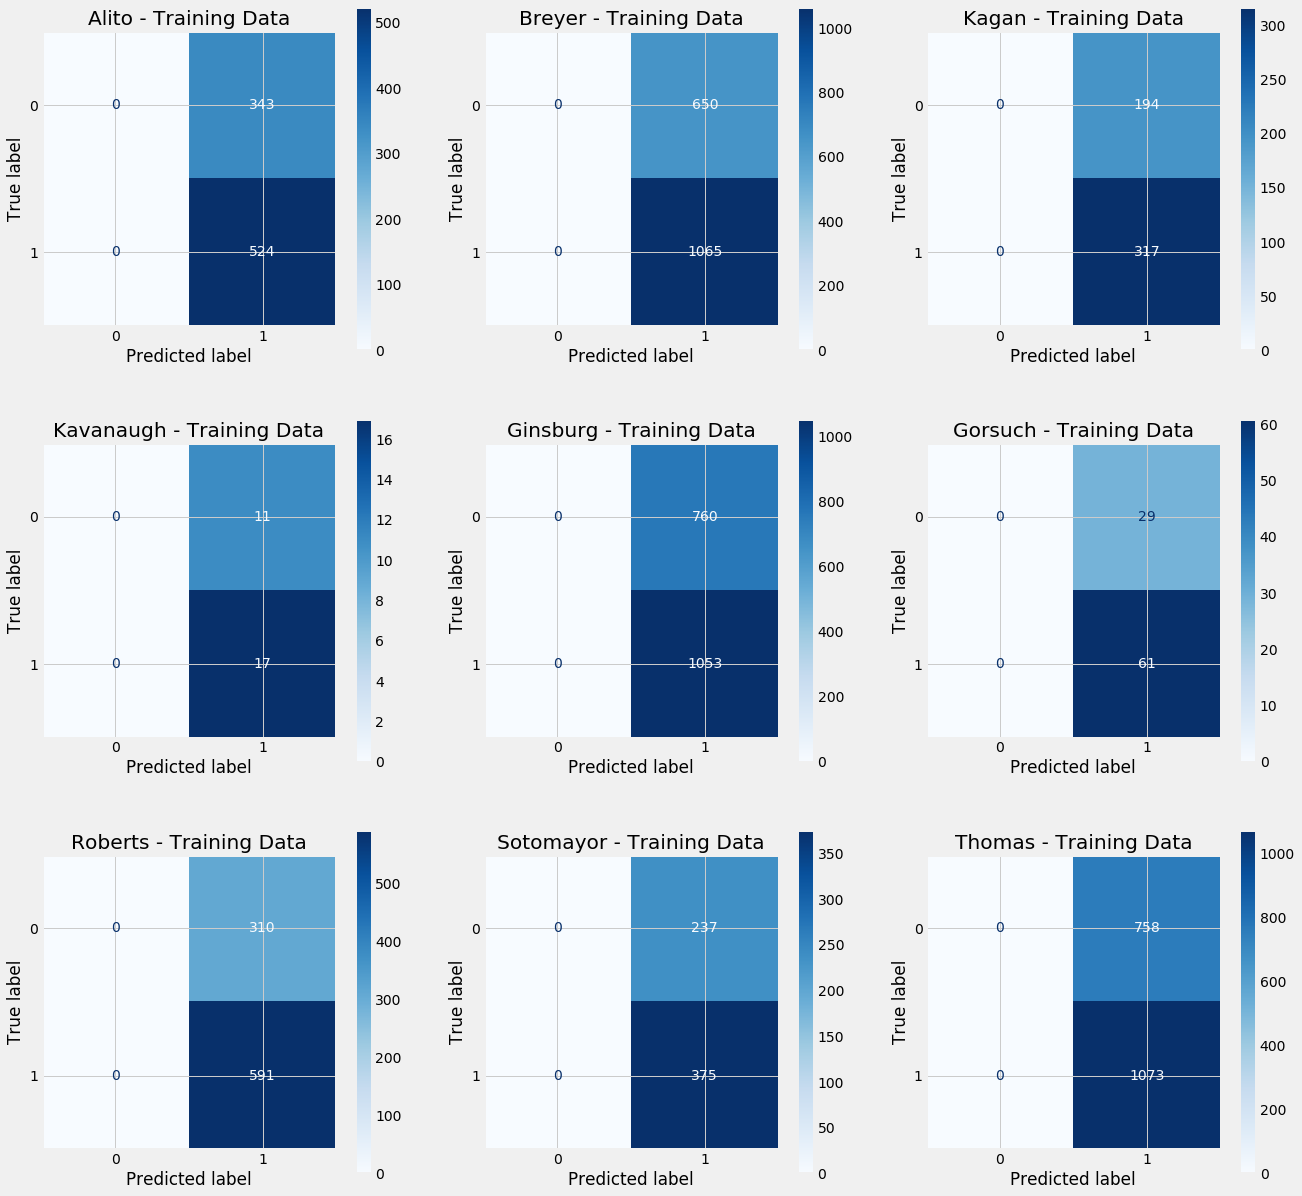

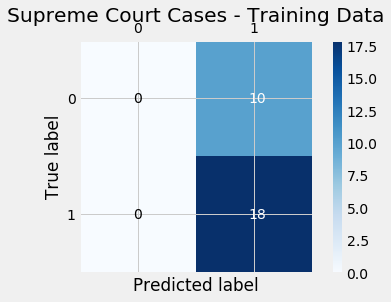

In [95]:
justices = ['alito', 'breyer', 'kagan', 'kavanaugh', 'ginsburg', 'gorsuch', 'roberts', 'sotomayor', 'thomas']
justice_models = []
for justice in justices:
    model = SVC(degree=2, 
                  gamma='auto', 
                  kernel='poly')
    
    jm = JusticeModel(justice, mode='full', model=model)
    jm.fit(balance_method=None)
    justice_models.append(jm)
    
#cases for Kavanaugh onward, thats the only way to evaluate how model does for cases
full_court_dockets = ['16-1094', '17-765', '17-647', '17-773', '17-1229', '17-1026',
       '17-1594', '17-1307', '17-1042', '17-1471', '17-571', '17-1174',
       '17-1201', '17-1299', '17-1672', '17-532', '17-1104', '17-290',
       '17-1094', '16-1275', '16-1363', '17-5554', '17-646', '17-1272',
       '17-1184', '17-988', '18-96', '17-949']

true_votes = []
pred_votes = []

fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for justice, model, ax_ in zip(justices, justice_models, ax.flatten()):
    fpath = 'data/clean/%s.csv' % justice.capitalize()
    test_data = pd.read_csv(fpath)
    X = test_data['cleanText'].fillna(' ').to_numpy()
    y_true = test_data['vote'].to_numpy()
    y_pred = model.predict(X)
    
    plot_confusion_matrix(model.model, model.test_vectors, y_true, cmap='Blues', ax=ax_)
    ax_.set_title('%s - Training Data' % justice.capitalize())
    
    full_court = test_data[test_data['docket'].isin(full_court_dockets)]
    X_full = full_court['cleanText'].fillna(' ').to_numpy()
    y_full = full_court['vote'].to_numpy()
    y_pred = model.predict(X_full)
    
    true_votes.append(np.array(y_full))
    pred_votes.append(np.array(y_pred))
    

true_votes = np.array(true_votes)
pred_votes = np.array(pred_votes)
total_true_votes = true_votes.sum(axis=0)
total_pred_votes = pred_votes.sum(axis=0)

pet_wins = np.argwhere(total_true_votes >= 5)
pet_loses = np.argwhere(total_true_votes < 5)

total_true_votes[pet_wins.flatten()] = 1
total_true_votes[pet_loses.flatten()] = 0
pet_wins = np.argwhere(total_pred_votes >= 5)
pet_loses = np.argwhere(total_pred_votes < 5)

total_pred_votes[pet_wins.flatten()] = 1
total_pred_votes[pet_loses.flatten()] = 0


from sklearn.metrics import confusion_matrix

labels = ['0', '1']
cm = confusion_matrix(total_true_votes, total_pred_votes)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='Blues')
plt.title('Supreme Court Cases - Training Data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(-0.04, 0.04, cm[0][0], color='black')
plt.text(-0.04, 1.04, cm[1][0], color='black')
plt.text(0.95, 0.04, cm[0][1], color='white')
plt.text(0.95, 1.04, cm[1][1], color='white')

plt.show()



Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.
Model trained successfully.


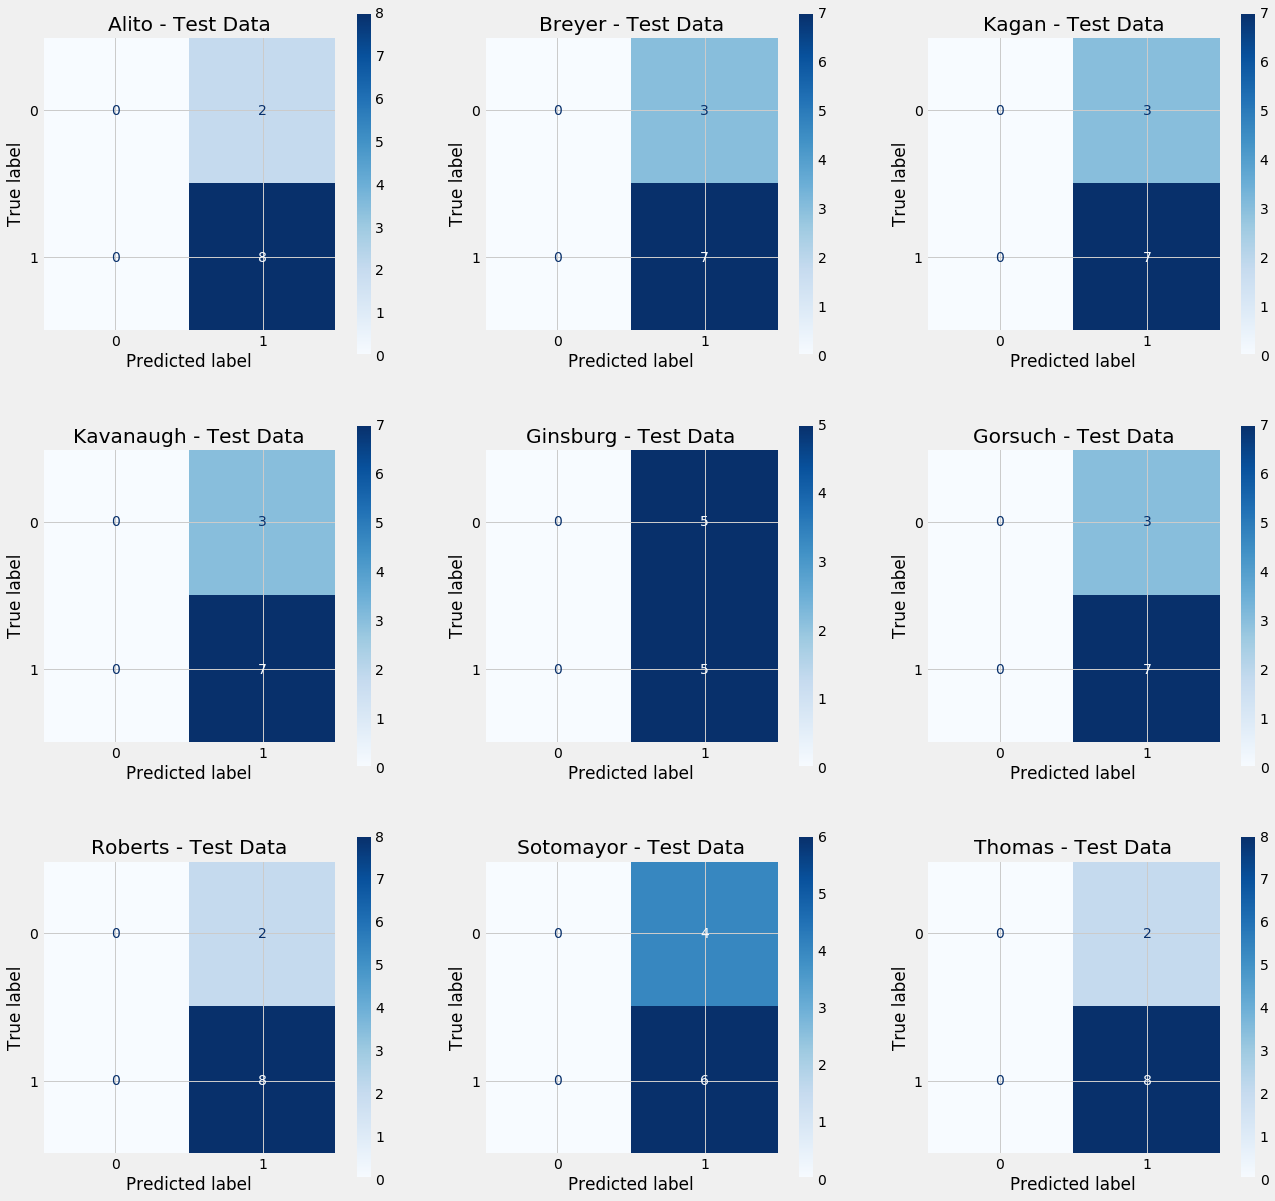

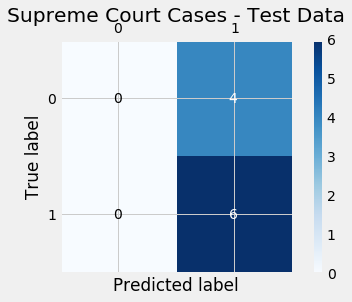

In [96]:
justices = ['alito', 'breyer', 'kagan', 'kavanaugh', 'ginsburg', 'gorsuch', 'roberts', 'sotomayor', 'thomas']
justice_models = []
for justice in justices:
    model = SVC(degree=2, 
                  gamma='auto', 
                  kernel='poly')
    
    jm = JusticeModel(justice, mode='full', model=model)
    jm.fit(balance_method=None)
    justice_models.append(jm)
    
true_votes = []
pred_votes = []

fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for justice, model, ax_ in zip(justices, justice_models, ax.flatten()):
    fpath = 'data/test/%s.csv' % justice.capitalize()
    test_data = pd.read_csv(fpath)
    X = test_data['cleanText'].fillna(' ').to_numpy()
    y_true = test_data['vote'].to_numpy()
    y_pred = model.predict(X)
    
    plot_confusion_matrix(model.model, model.test_vectors, y_true, cmap='Blues', ax=ax_)
    ax_.set_title('%s - Test Data' % justice.capitalize())
    
    
    true_votes.append(np.array(y_true))
    pred_votes.append(np.array(y_pred))
    

true_votes = np.array(true_votes)
pred_votes = np.array(pred_votes)
total_true_votes = true_votes.sum(axis=0)
total_pred_votes = pred_votes.sum(axis=0)

pet_wins = np.argwhere(total_true_votes >= 5)
pet_loses = np.argwhere(total_true_votes < 5)

total_true_votes[pet_wins.flatten()] = 1
total_true_votes[pet_loses.flatten()] = 0
pet_wins = np.argwhere(total_pred_votes >= 5)
pet_loses = np.argwhere(total_pred_votes < 5)

total_pred_votes[pet_wins.flatten()] = 1
total_pred_votes[pet_loses.flatten()] = 0


from sklearn.metrics import confusion_matrix

labels = ['0', '1']
cm = confusion_matrix(total_true_votes, total_pred_votes)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='Blues')
plt.title('Supreme Court Cases - Test Data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(-0.04, 0.04, cm[0][0], color='black')
plt.text(-0.04, 1.04, cm[1][0], color='black')
plt.text(0.95, 0.04, cm[0][1], color='white')
plt.text(0.95, 1.04, cm[1][1], color='white')

plt.show()


